## Как оценивать качество решения ML-задачи?

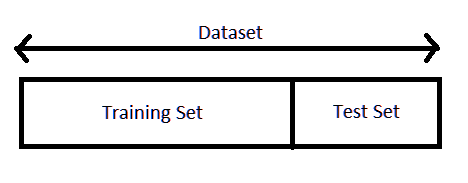

## Метрики задачи классификации

### Подготовка данных

Набор данных - [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) для задачи бинарной классификации

Признаки рассчитаны по оцифрованному изображению тонкоигольной аспирационной биопсии тканей молочной железы.



In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = load_breast_cancer()

# 0 – "доброкачественный"
# 1 – "злокачественный"
y = 1 - data["target"]
X = data["data"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

DummyClassifier - baseline

In [3]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train);

Логистическая регрессия - более сложная модель

In [4]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy

Accuracy (точность) - доля объектов, для которых мы правильно предсказали класс

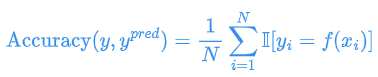

Данная метрика очень простая, но не лишена недостатков: она не учитывает дисбаланс классов.

Предположим, что мы решаем задачу классификации писем со спамом, и у нас в выборке 1000 объектов, из которых спам - 10 писем, а остальные 990 - не спам.

Тогда, взяв "модель", которая всегда классифицирует письмо как "не спам", мы автоматически получим accuracy = **0.99**, хотя сам классификатор не имеет никакой ценности.

Кроме того, иногда цена ошибки для разных классов отличается, например, в медицинской диагностике.



In [5]:
from sklearn.metrics import accuracy_score

In [6]:
y_pred_dummy = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred_dummy)

0.6293706293706294

In [7]:
y_pred_log_reg = log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)

0.9790209790209791

Рассмотрим более сложные метрики, позволяющие скорректировать недостатки Accuracy

### Precision & Recall

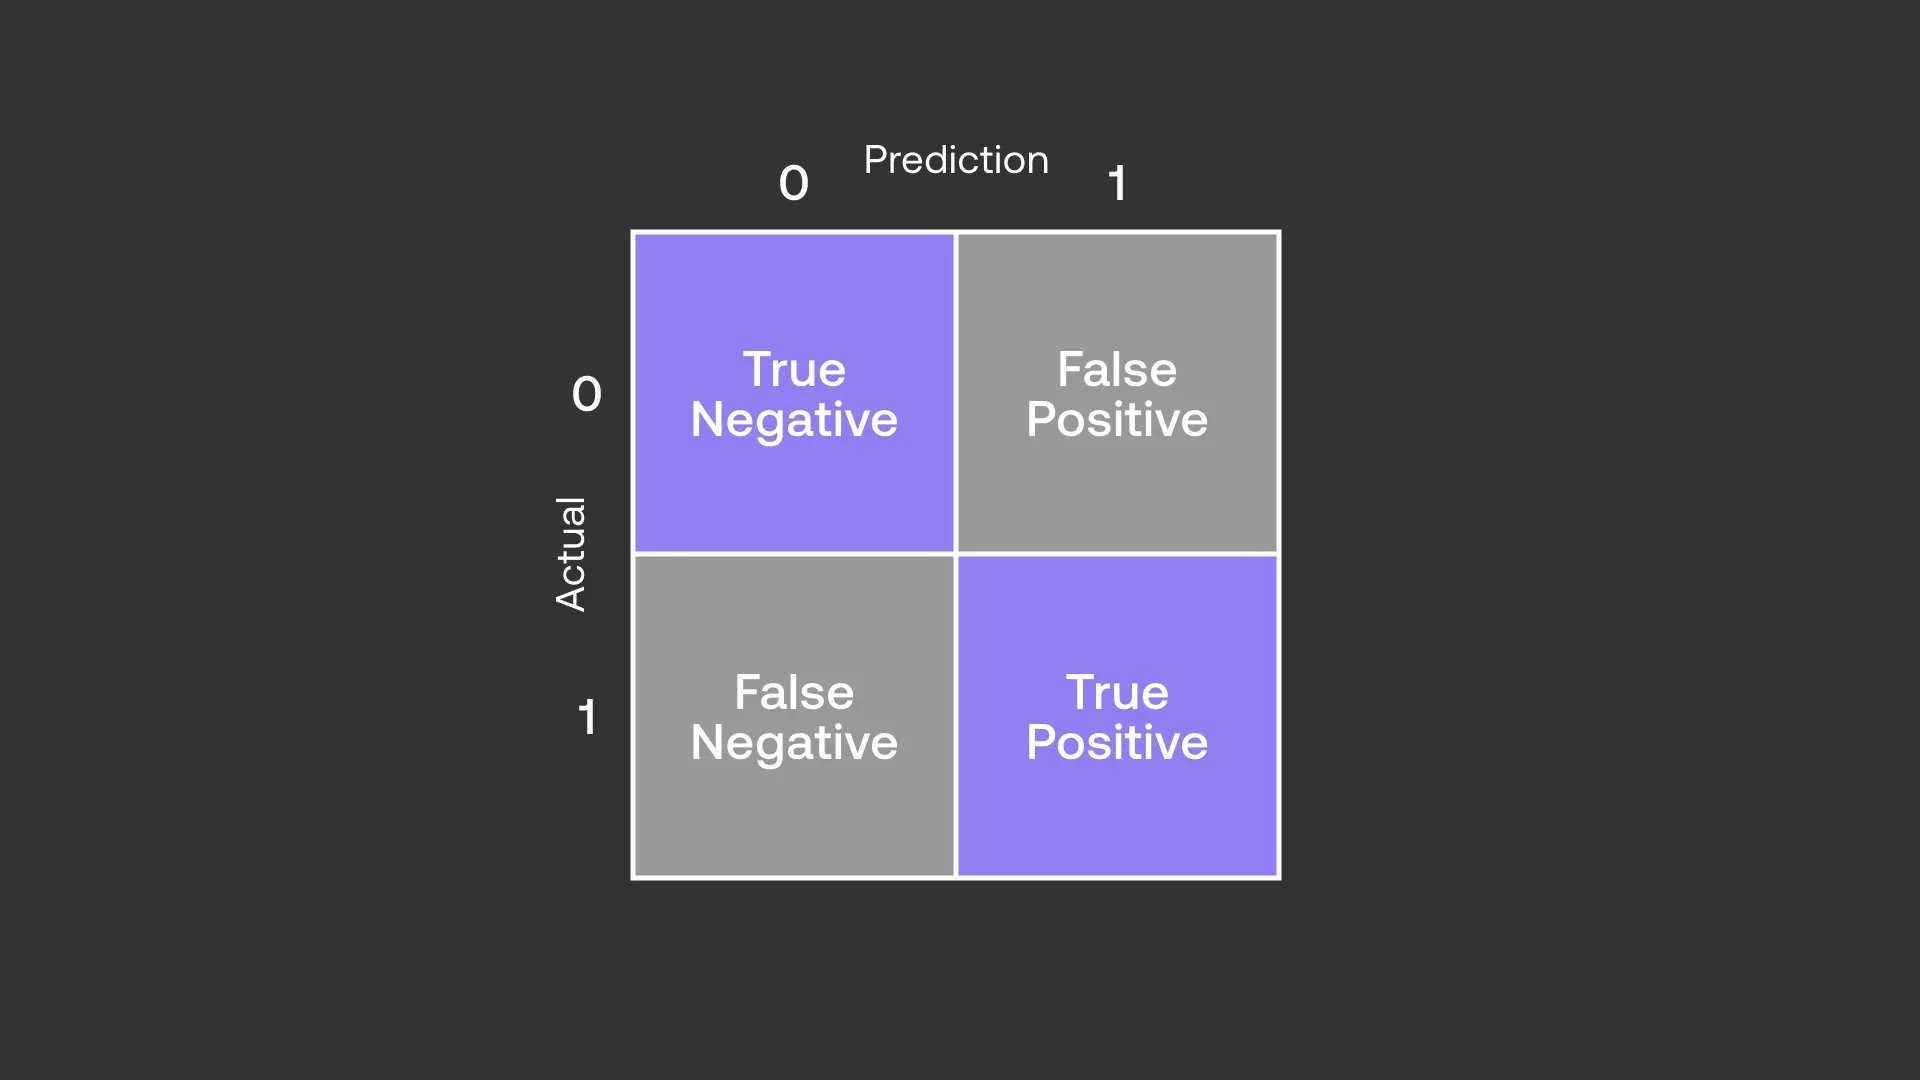

**TP** — истино-положительное решение;

**TN** — истино-отрицательное решение;

**FP** — ложно-положительное решение;

**FN** — ложно-отрицательное решение

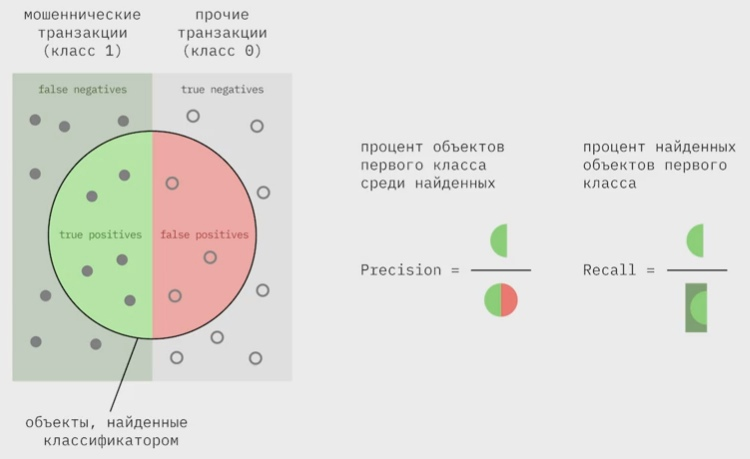

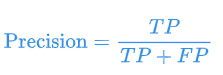

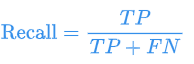

**Recall = True Positive Rate = Sensitivity**  - какой процент объектов класса 1 классифицировали правильно

**Precision** - какой процент объектов, отнесенных алгоритмом к классу 1, классифицировали правильно

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [9]:
confusion_matrix(y_test, y_pred_dummy)

array([[90,  0],
       [53,  0]])

In [10]:
confusion_matrix(y_test, y_pred_log_reg)

array([[88,  2],
       [ 1, 52]])

In [11]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_log_reg, zero_division=0)}')

Precision for Dummy Classificator: 0.0
Precision for Logistic regression: 0.9629629629629629


In [12]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_log_reg)}')

Recall for Dummy Classificator: 0.0
Recall for Logistic regression: 0.9811320754716981


### F-мера

Более удобно, когда метрика выражена одним числом. F-мера - комбинация precision и recall. Она стремится к нулю, если точность или полнота стремится к нулю.

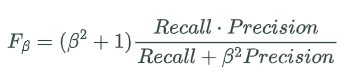

В случае, когда `beta = 1` precision и recall имеют одинаковый вклад в метрику. При `0 < beta < 1` больший вклад имеет precision, при `beta > 1` - recall

In [13]:
from sklearn.metrics import f1_score, fbeta_score

In [14]:
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')

F1-score for Dummy Classificator: 0.0
F1-score for Logistic regression: 0.9719626168224299


In [15]:
print(f'F1-score for Dummy Classificator (recall bias): {fbeta_score(y_test, y_pred_dummy, beta=2)}')
print(f'F1-score for Logistic regression (recall bias): {fbeta_score(y_test, y_pred_log_reg, beta=2)}')

F1-score for Dummy Classificator (recall bias): 0.0
F1-score for Logistic regression (recall bias): 0.9774436090225563


In [16]:
print(f'Fbeta-score for Dummy Classificator (precision bias): {fbeta_score(y_test, y_pred_dummy, beta=0.5)}')
print(f'Fbeta-score for Logistic regression (precision bias): {fbeta_score(y_test, y_pred_log_reg, beta=0.5)}')

Fbeta-score for Dummy Classificator (precision bias): 0.0
Fbeta-score for Logistic regression (precision bias): 0.966542750929368


Для оптимизации метрик можно перебрать пороги бинаризации при классификации (по умолчанию порог = 0.5), для каждого значения рассчитать precision и recall, а затем построить кривые метрик и выбрать оптимальное значение

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

In [18]:
y_pred = log_reg.predict_proba(X_test)[:, 1]

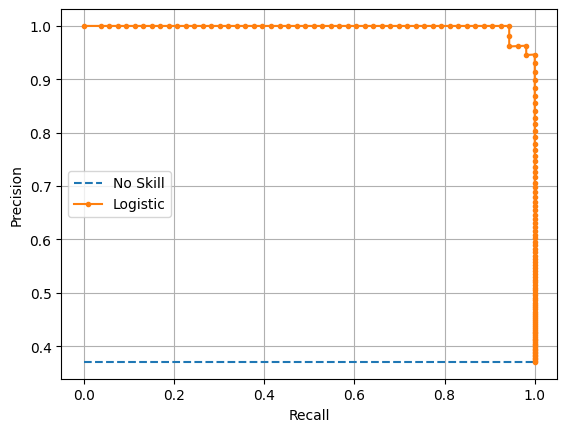

In [19]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

no_skill = len(y_test[y_test == 1]) / len(y_test)

plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

### Matthews Correlation Coefficient (MCC)

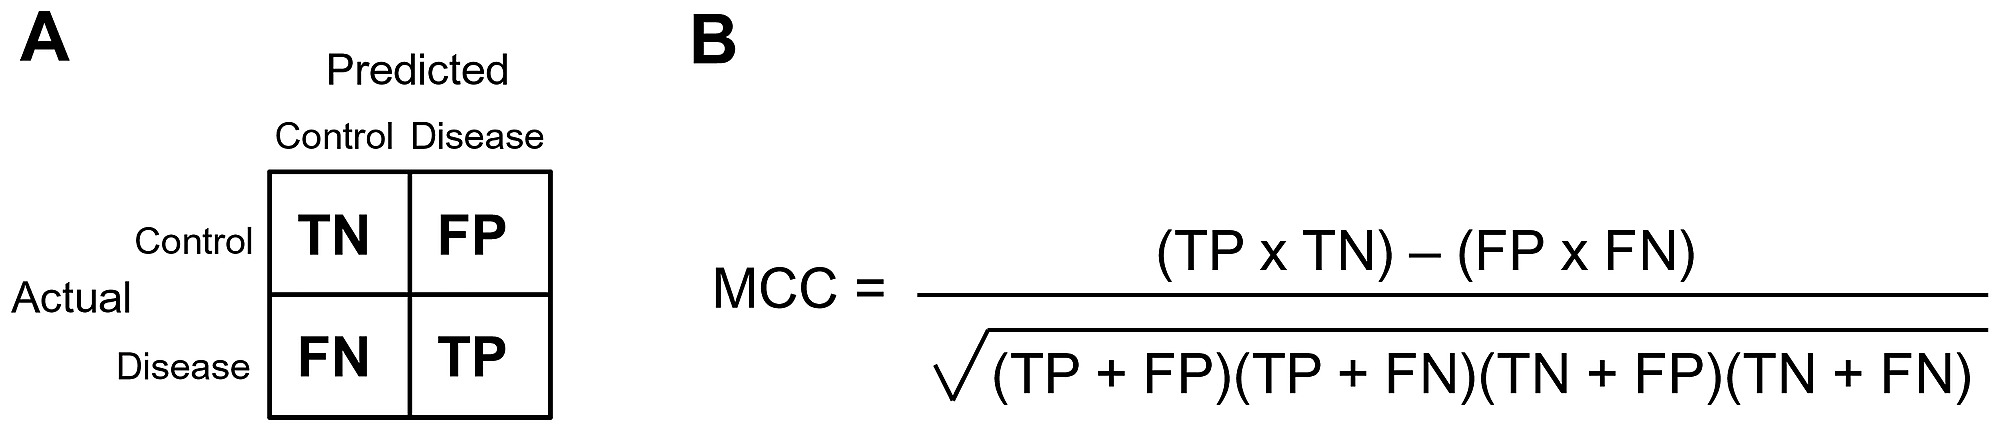

Наиболее сбалансированная метрика для оценки качества классификаторов, учитывающая все четыре компонента матрицы ошибок. MCC особенно полезен при сильном дисбалансе классов.



In [20]:
from sklearn.metrics import matthews_corrcoef

In [21]:
def build_dataset(tp, fp, fn, tn):
    y_true_pos = np.ones(tp + fn, dtype=int)
    y_pred_pos = np.array([1]*tp + [0]*fn, dtype=int)

    y_true_neg = np.zeros(fp + tn, dtype=int)
    y_pred_neg = np.array([1]*fp + [0]*tn, dtype=int)

    y_true = np.concatenate([y_true_pos, y_true_neg])
    y_pred = np.concatenate([y_pred_pos, y_pred_neg])
    return y_true, y_pred

In [22]:
def report(name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    print(name)
    print("\nConfusion matrix [[TP FN],[FP TN]]:")
    print(cm)
    print(f"\nF1:  {f1:.3f}")
    print(f"MCC: {mcc:.3f}\n")

50 положительных (TP=30, FN=20) и 100 отрицательных (FP=10, TN=90)

In [23]:
y_true_A, y_pred_A = build_dataset(tp=30, fp=10, fn=20, tn=90)
report("Вариант 1 (мало отрицательных)", y_true_A, y_pred_A)

Вариант 1 (мало отрицательных)

Confusion matrix [[TP FN],[FP TN]]:
[[30 20]
 [10 90]]

F1:  0.667
MCC: 0.533



50 положительных те же (TP=30, FN=20), но отрицательных очень много (FP=10, TN=9990)

In [24]:
y_true_B, y_pred_B = build_dataset(tp=30, fp=10, fn=20, tn=9990)
report("Вариант 2 (очень много отрицательных)", y_true_B, y_pred_B)

Вариант 2 (очень много отрицательных)

Confusion matrix [[TP FN],[FP TN]]:
[[  30   20]
 [  10 9990]]

F1:  0.667
MCC: 0.669



- В обоих случаях F1 = 0.667, так как F1 зависит только от TP, FP и FN
- MCC во втором варианте выше, потому что при огромном числе отрицательных примеров модель сохраняет низкую долю FP, и эта информация учитывается в MCC


### AUC ROC – площадь под ROC-кривой

Показывает долю ложно положительных примеров (false positive rate) в сравнении с долей истинно положительных примеров (англ. true positive rate).

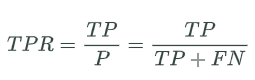

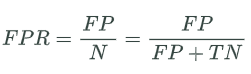

#### Построение

[AUC ROC (площадь под кривой ошибок](https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)

* Пусть алгоритм выдал оценки, как показано в табл. 1.
* Упорядочим строки табл. 1 по убыванию ответов алгоритма – получим табл. 2.
* В идеале её столбец «класс» тоже станет упорядочен (сначала идут 1, потом 0); в самом худшем случае – порядок будет обратный (сначала 0, потом 1); в случае «слепого угадывания» будет случайное распределение 0 и 1.
* Чтобы нарисовать ROC-кривую, надо взять единичный квадрат на координатной плоскости, разбить его на m равных частей горизонтальными линиями и на n – вертикальными, где m – число 1 среди правильных меток теста (в нашем примере m=3), n – число нулей (n=4). В результате квадрат разбивается сеткой на m×n блоков.
* Будем просматривать строки табл. 2 сверху вниз и прорисовывать на сетке линии, переходя их одного узла в другой. Стартуем из точки (0, 0). Если значение метки класса в просматриваемой строке 1, то делаем шаг вверх; если 0, то делаем шаг вправо. Ясно, что в итоге мы попадём в точку (1, 1), т.к. сделаем в сумме m шагов вверх и n шагов вправо.

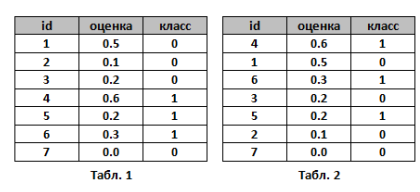

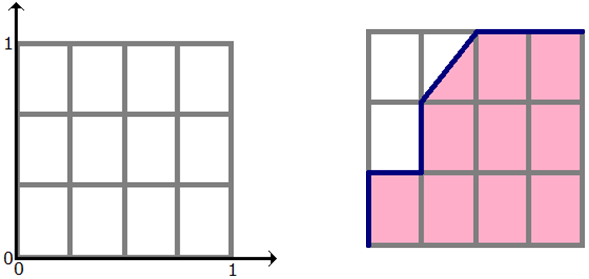

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

In [26]:
def plot_roc_auc(fpr, tpr, thresholds, title):
  plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
  plt.plot(fpr, tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid()
  plt.show()

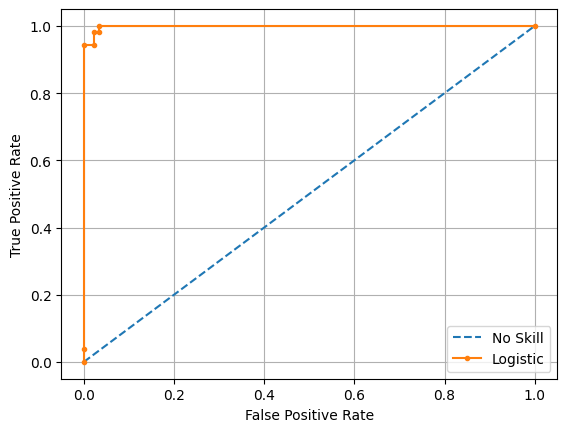

In [27]:
y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Logistic regression')

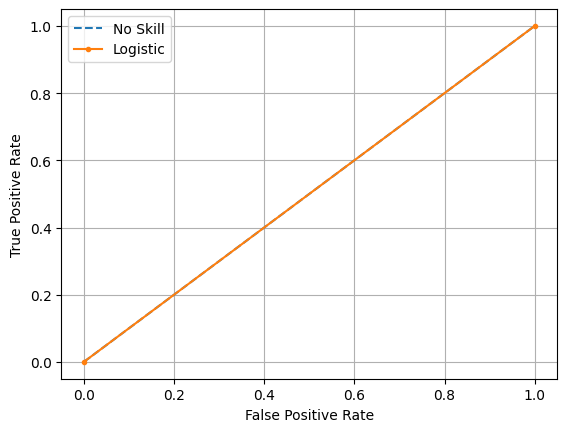

In [28]:
y_pred = dummy_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Dummy')

Чем лучше классификатор разделяет два класса, тем больше площадь (area under curve) под ROC-кривой – и мы можем использовать её в качестве метрики.

**NB**

- При сильном дисбалансе (например, 1% положительных) общий объём отрицательных примеров огромен. Даже если модель генерирует тысячи ложноположительных срабатываний, FPR может оставаться низким (FP относительно TN великого множества остаётся незначительным)

- Высокий AUC (например, 0.95) лишь показывает, что по среднему порогу TPR опережает FPR. Но на практических порогах (где бизнесу важно контролировать FP) модель может давать неприемлемое число ложных тревог

**Пример**

Допустим, в задаче банковского скоринга есть 100.000 заявок, из них 1.000 (1%) фродовые.

Модель имеет хорошую разделяющую способность, но в проде при выбранном пороге классификации оказалось, что TPR = 0.90 (обнаруживает 900 мошенников), FPR = 0.02 (ошибочно отклоняет 2.000 нормальных заявок), что может быть неприемлемо, но ROC-AUC этого может не показать

### Многоклассовая классификация - F1-мера

Если классов больше, чем 2, мы имеем дело с многоклассовой классификацией.

Если задача классификации на  классов ставится как  задач об отделении каждого класса  от остальных (one vs all), то для каждой из них можно посчитать свою матрицу ошибок. Затем есть два варианта получения итогового значения метрики из  матриц ошибок:

- **micro**: усредняем элементы матрицы ошибок (TP, FP, TN, FN) между бинарными классификаторами, например . Затем по одной усреднённой матрице ошибок считаем Precision, Recall, F-меру.

- **macro**: считаем Precision, Recall для каждого классификатора отдельно, а потом усредняем.

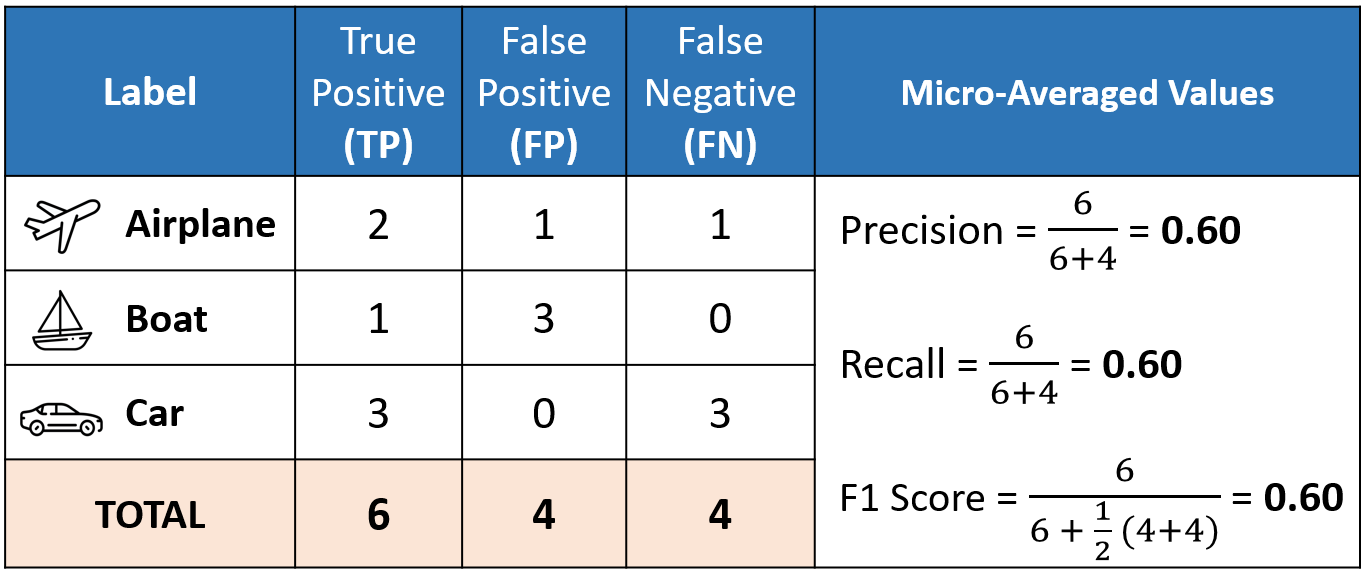

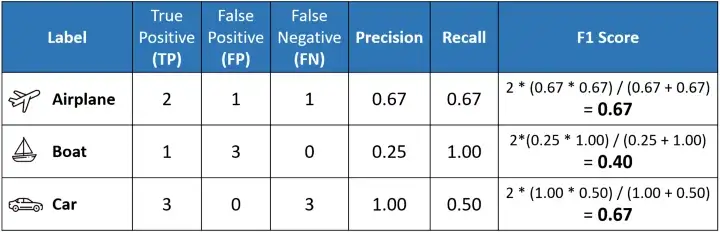

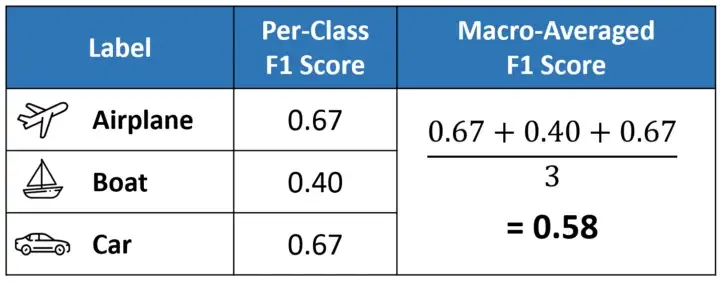

В случае дисбаланса классов способ усреднения может оказать существенное влияние: при макроусреднении все классы вносят одинаковый вклад, при микроусреднении минорные классы не влияют на метрику

## Метрики задачи регрессии

### Подготовка данных

Набор данных содержит данные о пациентах с диабетом и содержит определенные характеристики, такие как их ИМТ, возраст, артериальное давление и уровень глюкозы, которые полезны для прогнозирования прогрессирования диабета у пациентов.

In [29]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [30]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362
409,-0.052738,0.050680,-0.011595,0.056301,0.056221,0.072902,-0.039719,0.071210,0.030564,-0.005220
55,-0.041840,-0.044642,-0.049318,-0.036656,-0.007073,-0.022608,0.085456,-0.039493,-0.066490,0.007207
157,-0.001882,0.050680,-0.033151,-0.018306,0.031454,0.042840,-0.013948,0.019917,0.010227,0.027917
70,-0.001882,-0.044642,-0.069797,-0.012556,-0.000193,-0.009143,0.070730,-0.039493,-0.062917,0.040343


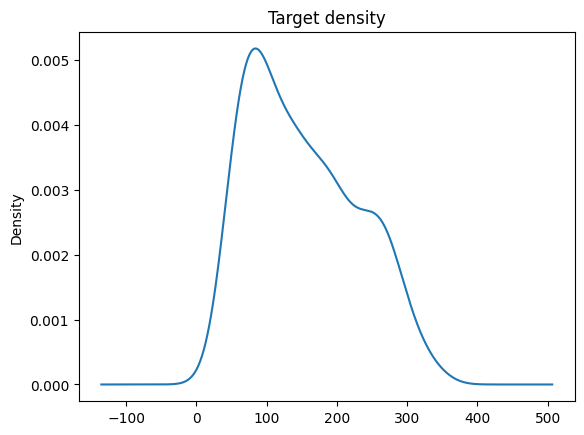

In [31]:
y.plot(kind='kde', title='Target density');

In [32]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

### MSE & RMSE

MSE – одна из самых популярных метрик в задаче регрессии.

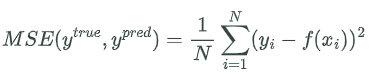

In [34]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import seaborn as sns
import pandas as pd

In [35]:
print(f'MSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy)}')
print(f'MSE for Linear regression: {mean_squared_error(y_test, y_preds_lr)}')

MSE for Dummy Regressor: 6667.117117117117
MSE for Linear regression: 3220.1288682415793


In [36]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy)}')
print(f'RMSE for Linear regression: {root_mean_squared_error(y_test, y_preds_lr)}')

RMSE for Dummy Regressor: 6667.117117117117
RMSE for Linear regression: 56.74617932726026


In [37]:
def plot_model_results(actual, predicted, title):
  results = pd.DataFrame({'True': actual, 'Prediction': predicted})
  sns.lmplot(x='True', y='Prediction', data=results, fit_reg=False)
  d_line= np.arange(results.min().min(), results.max().max())
  plt.plot(d_line, d_line, color='red', linestyle='--')
  plt.title = title
  plt.grid()
  plt.show()

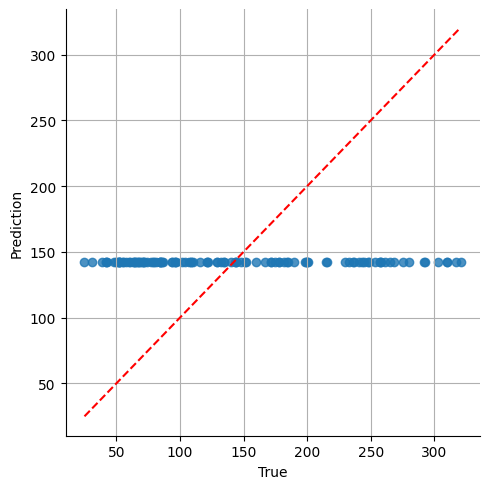

In [38]:
plot_model_results(y_test, y_preds_dummy, title='Dummy')

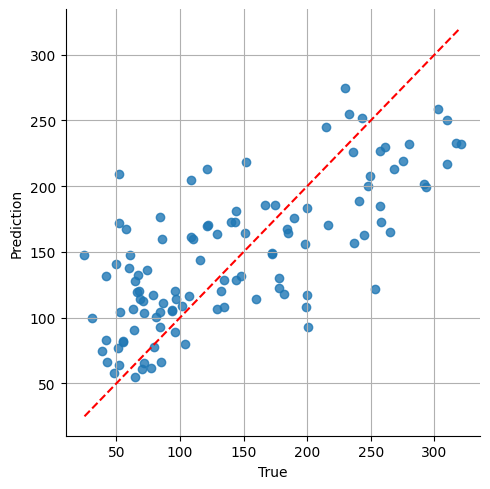

In [39]:
plot_model_results(y_test, y_preds_lr, title='Linear Regression')

MSE квадратично штрафует за большие ошибки на объектах. Сильный штраф за ошибки - полезное свойство, но если тестовых данных присутствуют выбросы, то нам будет сложно объективно сравнить модели между собой: ошибки на выбросах будет маскировать различия в ошибках на основном множестве объектов.

Таким образом, если мы будем сравнивать две модели при помощи MSE, у нас будет выигрывать та модель, у которой меньше ошибка на объектах-выбросах

RMSE - квадратный корень из MSE. Рассчитывается в тех же единицах, что и целевая переменная

### MAE

Для уменьшения чувствительности к выбросам можно использовать MSE

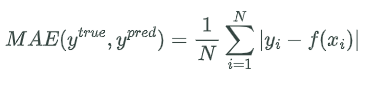

In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
print(f'MAE for Dummy Regressor: {mean_absolute_error(y_test, y_preds_dummy)}')
print(f'MAE for Linear regression: {mean_absolute_error(y_test, y_preds_lr)}')

MAE for Dummy Regressor: 70.28828828828829
MAE for Linear regression: 46.36377767462563


Еще пример

In [42]:
example = pd.DataFrame({
    'Actual': [100, 100, 100, 100, 100, 100, 100, 100, 100, 10],
    'Prediction': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
})
print(f"MSE: {mean_squared_error(example['Actual'], example['Prediction'])}")
print(f"RMSE: {root_mean_squared_error(example['Actual'], example['Prediction'])}")
print(f"MAE: {mean_absolute_error(example['Actual'], example['Prediction'])}")

MSE: 810.0
RMSE: 28.460498941515414
MAE: 9.0


Бизнес-смысл: MAE прогнозирует медиану, RMSE - среднее

### MAPE

MSE и MAE считают абсолютную ошибку, однако бывает полезно посчитать относительную, например, в процентах

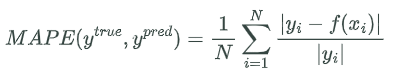

In [43]:
from sklearn.metrics import mean_absolute_percentage_error

In [44]:
print(f'MAPE for Dummy Regressor: {mean_absolute_percentage_error(y_test, y_preds_dummy)}')
print(f'MAPE for Linear regression: {mean_absolute_percentage_error(y_test, y_preds_lr)}')

MAPE for Dummy Regressor: 0.7267639652835988
MAPE for Linear regression: 0.4892669580647379


Проблема раз:

In [45]:
example = pd.DataFrame({
    'Actual': [100, 100, 100, 100, 100, 100, 100, 100, 100, 0],
    'Prediction': [100, 100, 100, 100, 100, 100, 100, 100, 100, 1]
})
print(f"MAPE: {mean_absolute_percentage_error(example['Actual'], example['Prediction'])}")

MAPE: 450359962737049.6


Проблема два:

In [46]:
print(f"MAPE: {mean_absolute_percentage_error([100], [50])}")

MAPE: 0.5


In [47]:
print(f"MAPE: {mean_absolute_percentage_error([50], [100])}")

MAPE: 1.0


Для слишком низких прогнозов ошибка не превышает 100%, для слишком высоких верхнего предела нет - метрика несимметрична

MAPE больше штрафует за перепрогноз ➡ ML-модели оптимально недопрогнозировать

### sMAPE - symmetric MAPE

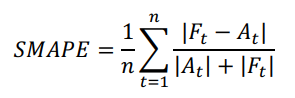

In [48]:
def standard_smape(actual, forecast):
    return np.mean(np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast))) * 100

In [49]:
example = pd.DataFrame({
    'Actual': [100, 100, 100, 100, 100, 100, 100, 100, 100, 0],
    'Prediction': [100, 100, 100, 100, 100, 100, 100, 100, 100, 1]
})
print(f"MAPE: {standard_smape(example['Actual'], example['Prediction'])}")

MAPE: 10.0


In [50]:
print(f"MAPE: {standard_smape(np.array([100]), np.array([50]))}")

MAPE: 33.33333333333333


In [51]:
print(f"MAPE: {standard_smape(np.array([50]), np.array([100]))}")

MAPE: 33.33333333333333


### Коэффициент детерминации

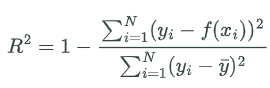

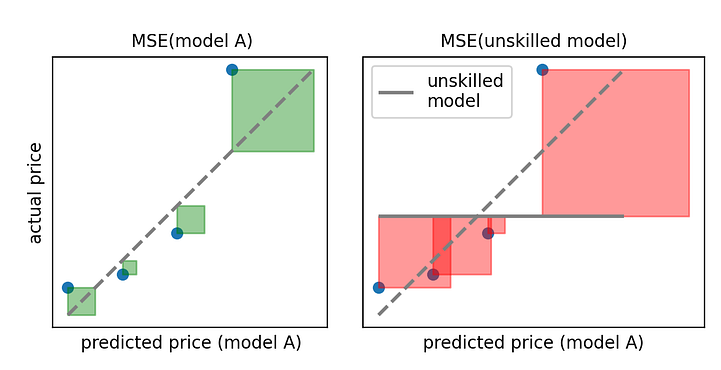

Коэффициент детерминации показывает, какая доля дисперсии таргетов (знаменатель) объяснена моделью. У идеальных предсказаний равен 1, у лучшего константного предсказания он равен  0 на обучающей выборке.

In [52]:
from sklearn.metrics import r2_score

In [53]:
print(f'R2 score for Dummy Regressor: {r2_score(y_test, y_preds_dummy)}')
print(f'R2 score for Linear regression: {r2_score(y_test, y_preds_lr)}')

R2 score for Dummy Regressor: -0.00028879043300489293
R2 score for Linear regression: 0.5168738220629059


Основная проблема применения этой метрики заключается в том, что ее значение увеличивается (не уменьшается) от добавления в модель новых переменных, даже если эти переменные никакого отношения к объясняемой переменной не имеют. Поэтому сравнение моделей с разным количеством факторов с помощью коэффициента детерминации, вообще говоря, некорректно. Для этих целей можно использовать альтернативные показатели (adjusted R squared).

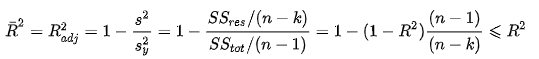

 n — количество наблюдений, k — количество параметров

В целом лучший способ добиться минимизации метрики  — выбрать ее в качестве функции потерь. MSE, RMSE можно оптимизировать напрямую, MAE - тоже, но доопределив в точке 0.

## Панель метрик

Для ML-задач необязательно использовать строго одну метрику, даже наоборот.

Например: **Многоклассовая классификация (Распознавание изображений)**



1.   Основная метрика - Top-1 Accuracy > 92%
2.   Дополнительные метрики:
  *   Top-5 Accuracy > 98%
  *   Macro F1-Score > 0.9
  *   Min Per-class Precision > 0.85
3. Стресс-метрики:
  *   Accuracy на изображениях низкого качества > 80%
4. Допустимые уровни:
  *   Критический - Top-1 < 88%, Macro F1 < 0.85
  *   Предупреждение - Top-1 < 90%, Macro F1 < 0.88
  *   Нормальный - Все метрики выше пороговых значений

